<a href="https://colab.research.google.com/github/dinann1990/Zenius/blob/main/Assessment_3_Perdinan_Daud_Panggabean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assessment 3 - Checkpoint 1**
---
Data Source :

https://github.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/blob/master/datasets/number-of-natural-disaster-events.csv

https://github.com/dataenergy/Exploratory-data-analysis-of-climate-change-and-natural-disasters/blob/master/datasets/economic-damage-from-natural-disasters.csv

Dalam analisis ini, digunakan data `number of natural disaster` dan `economic damage from natural disaster` untuk setiap `year` (tahun) dan `entity` (setiap tipe disaster)

# **Part 1: SQL Database Setup and Queries**
---

##1.1 Database: SQL Query I


      1. Import the downloaded dataset into a SQL database.
      2. Write an SQL query to fetch Year and any relevant variables (e.g., Number of natural disasters, Economic damage).


### **1.1.1 Import the downloaded dataset into a SQL database.**
---

#### Import Number Natural Disaster

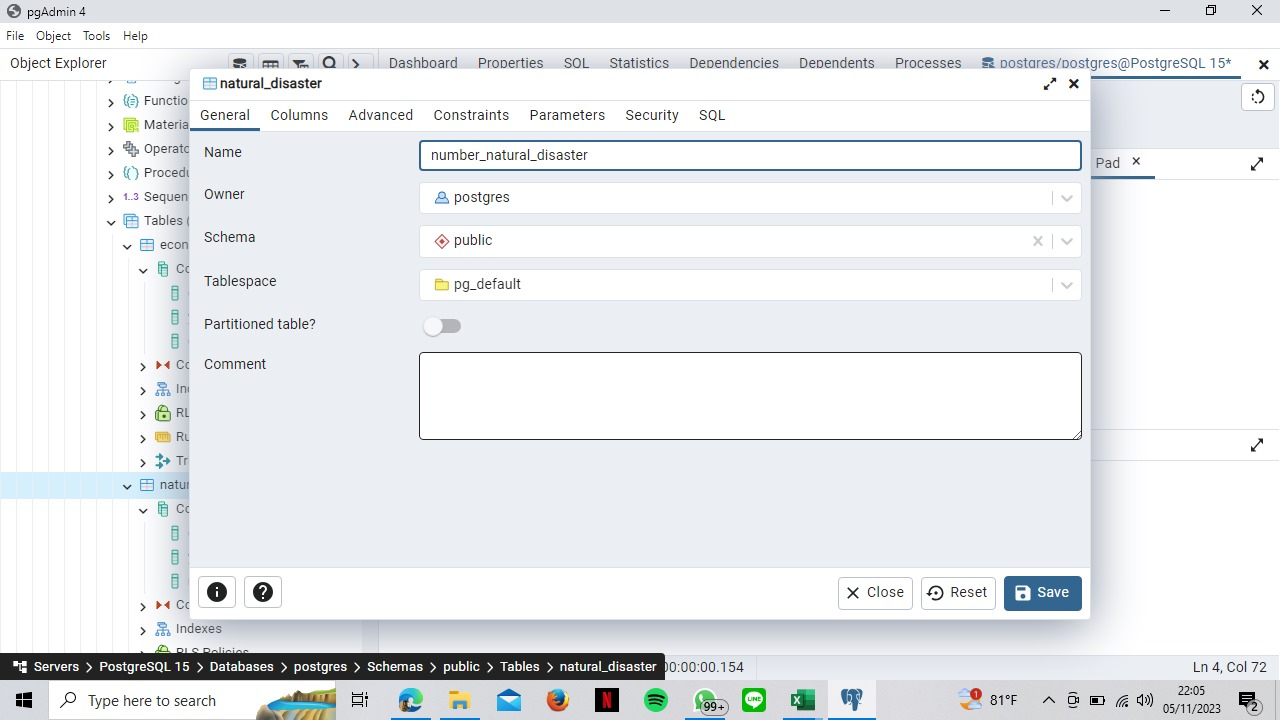

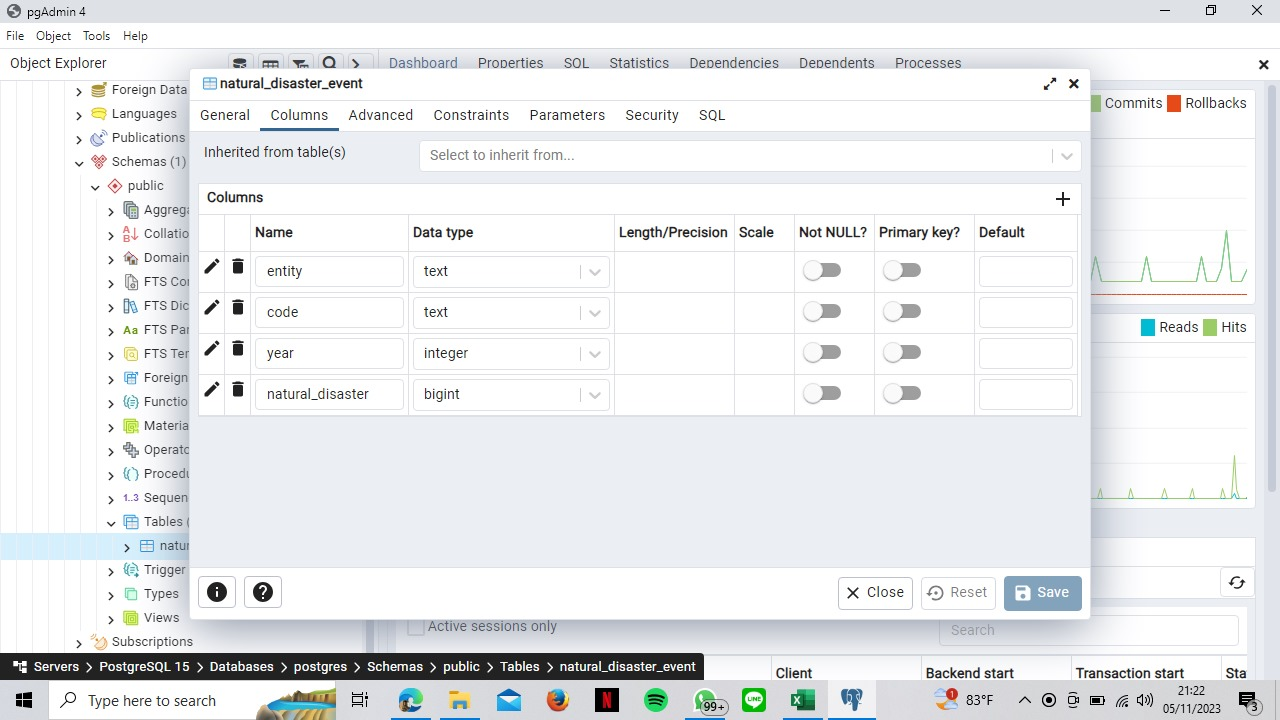

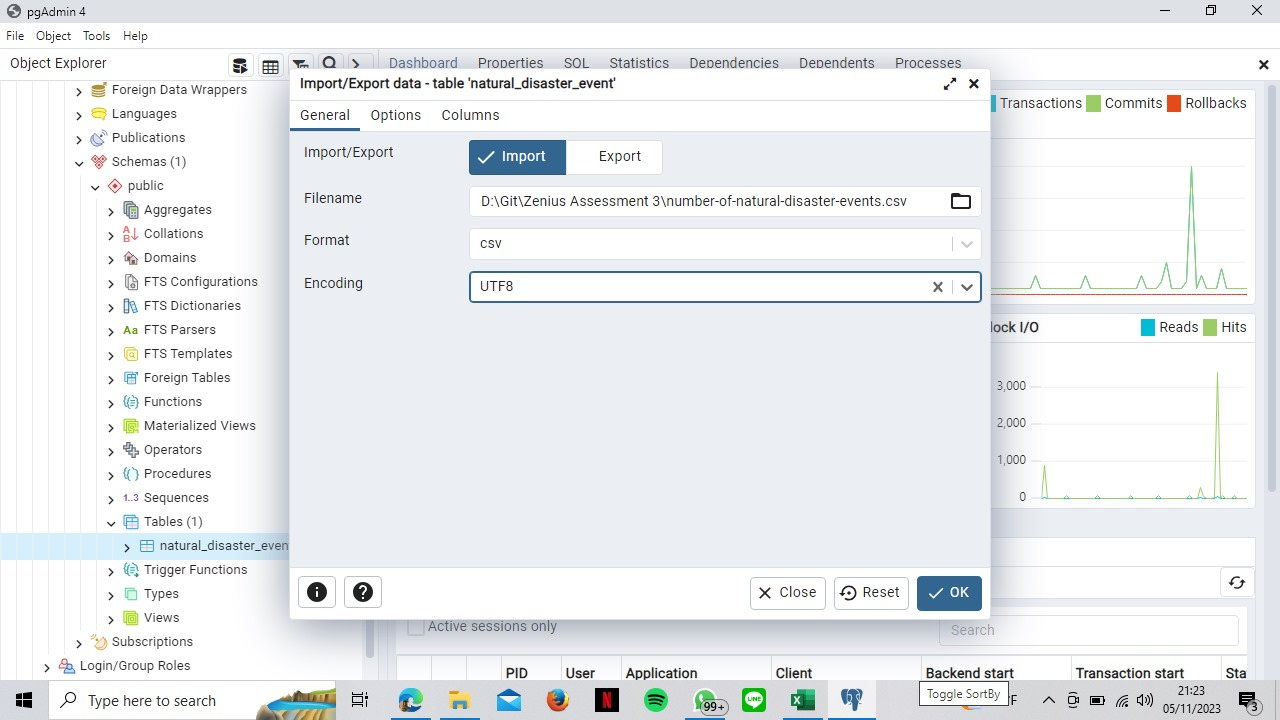

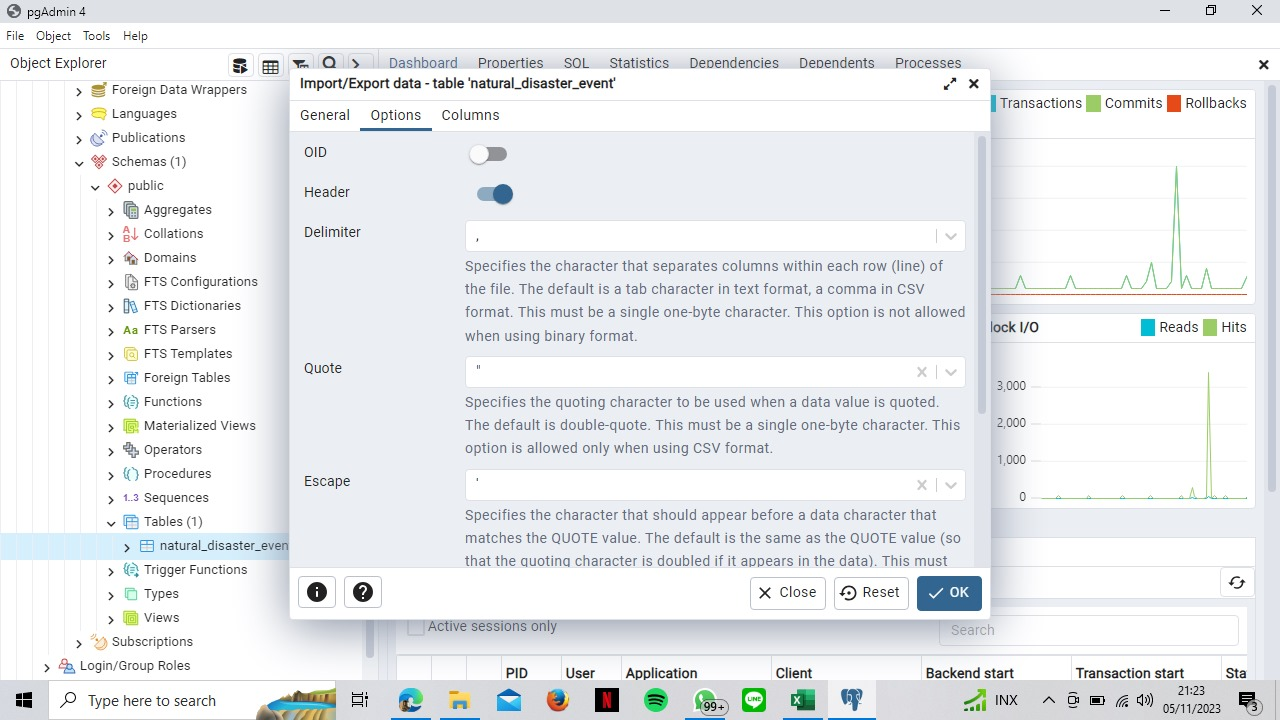

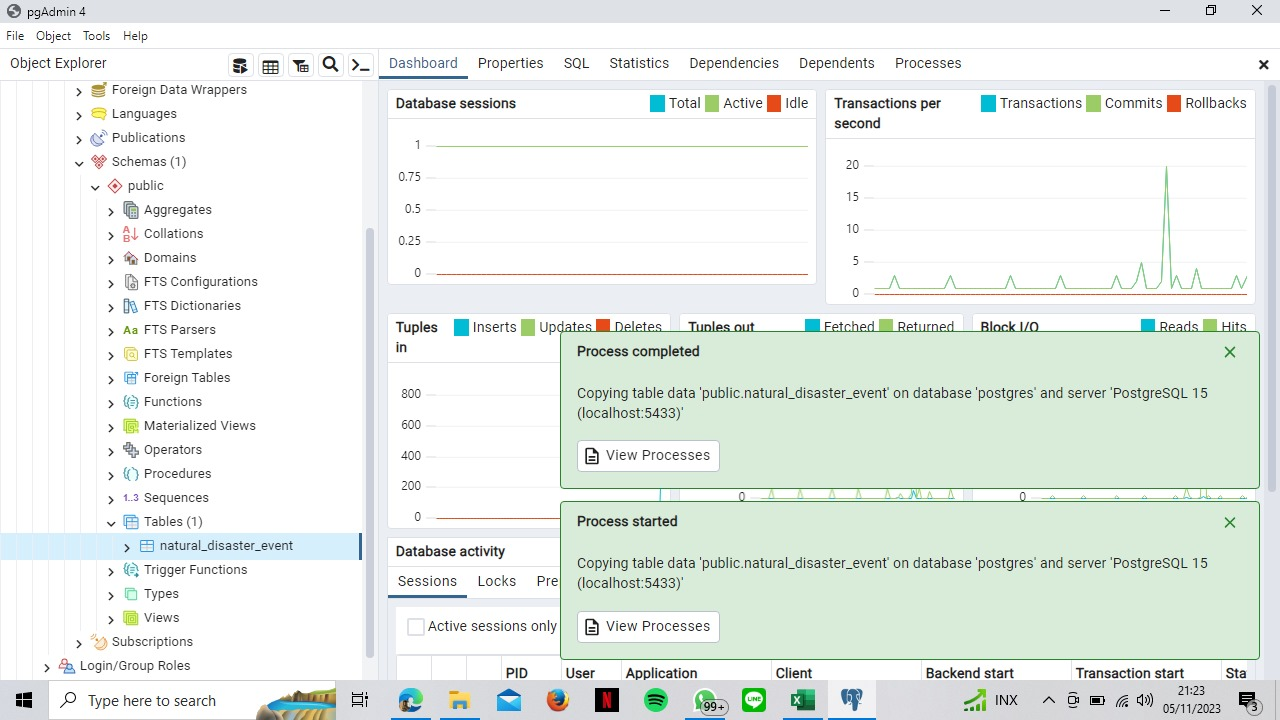

#### Import Total Economic Damage

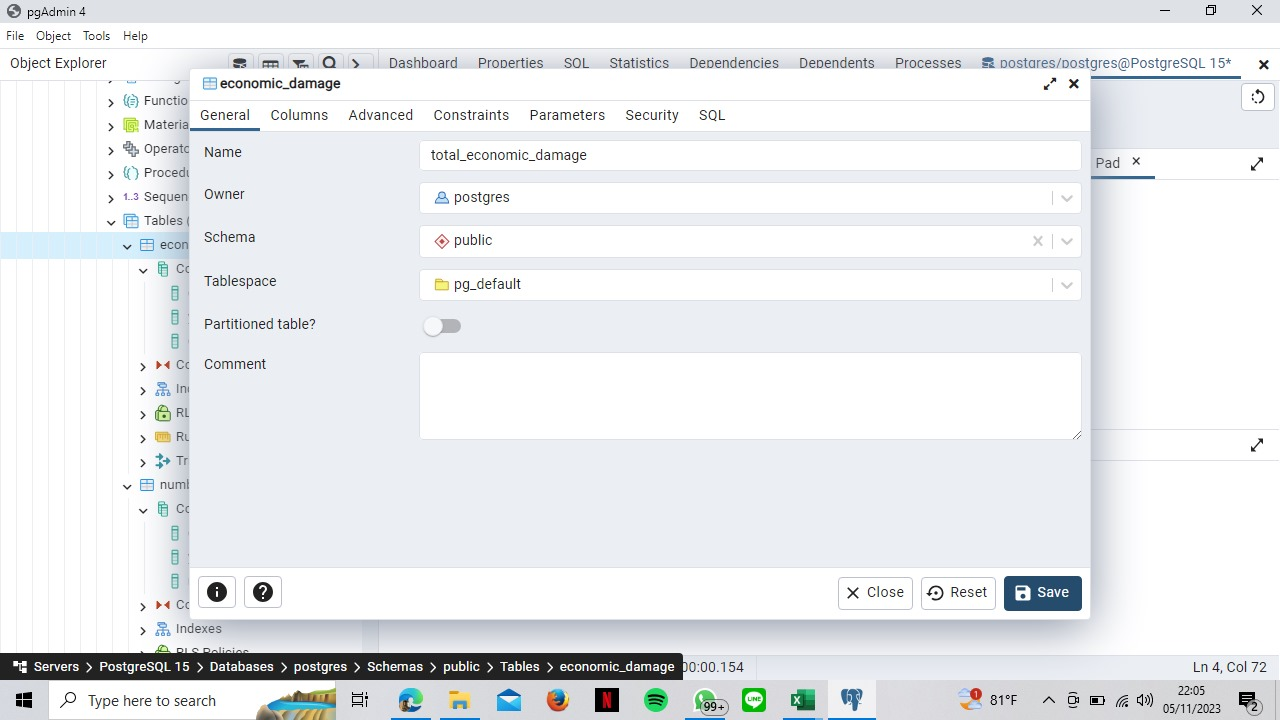

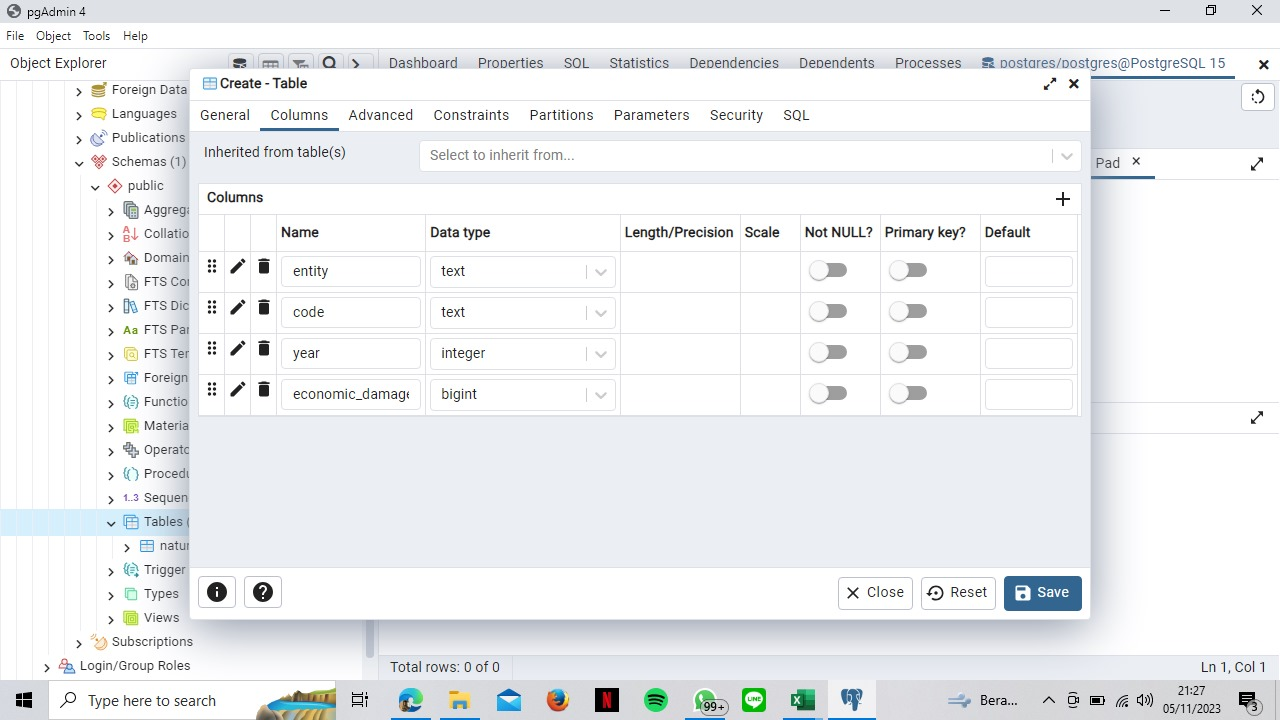

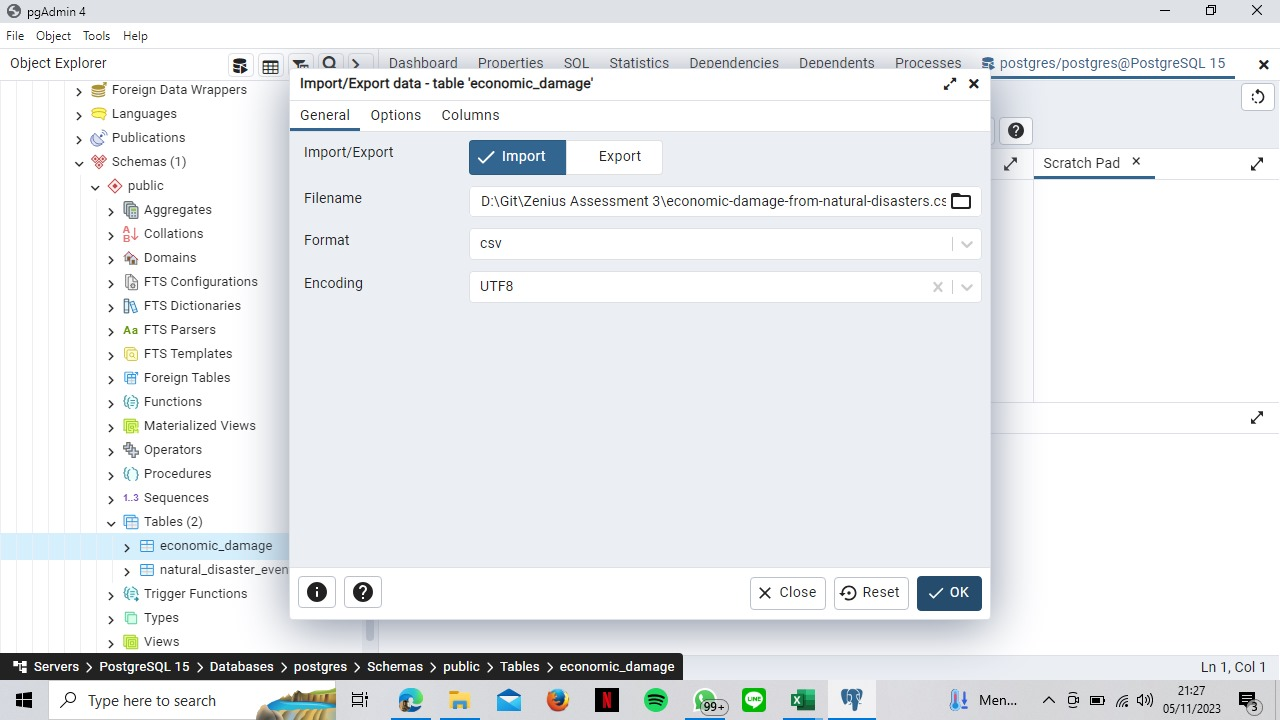

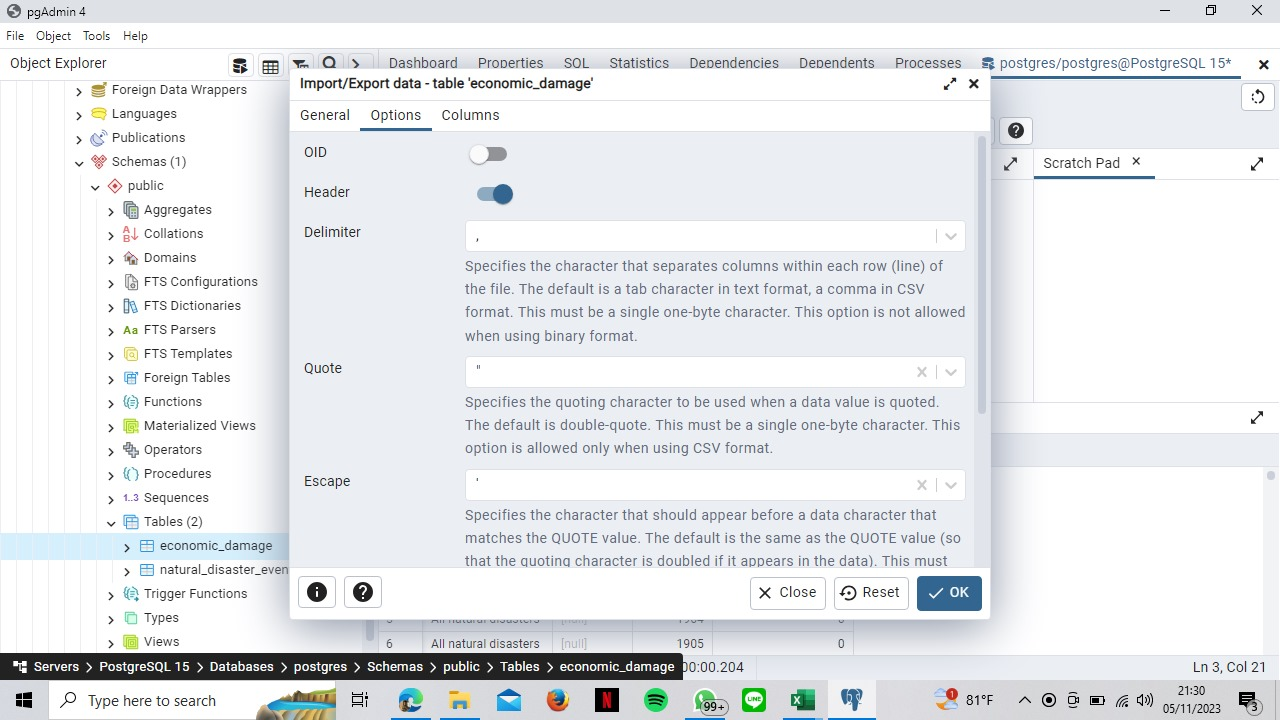

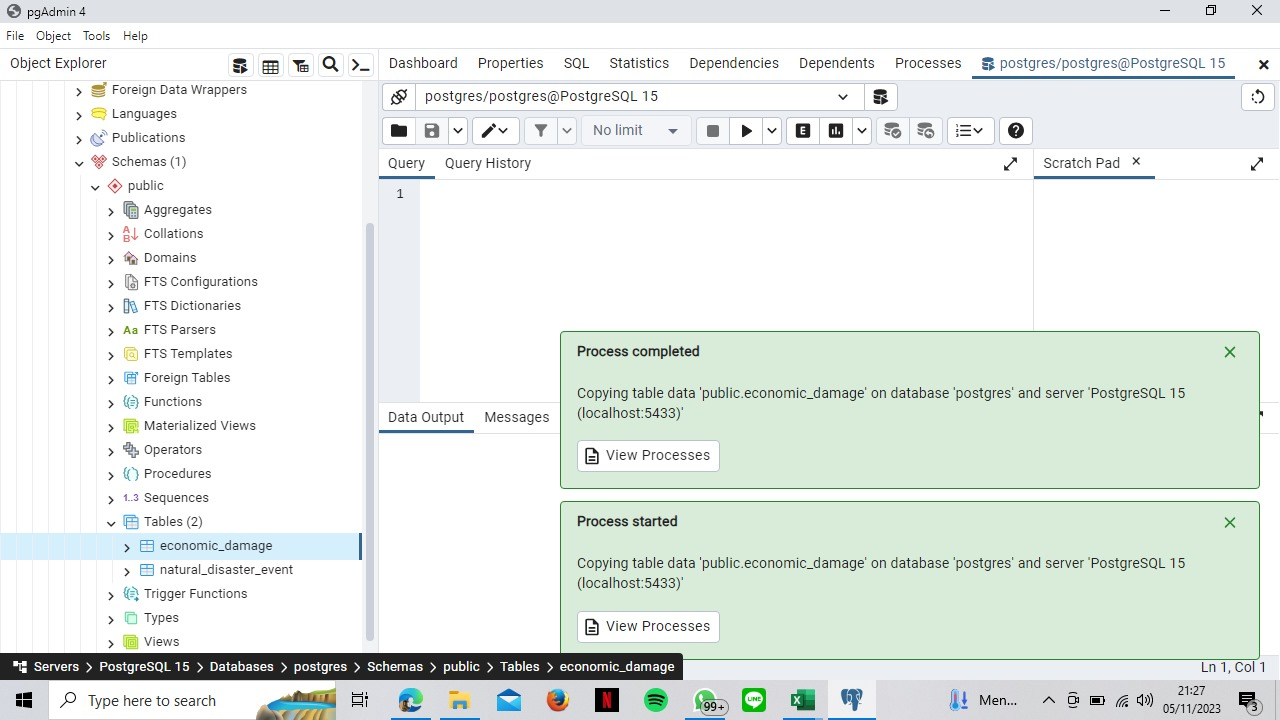

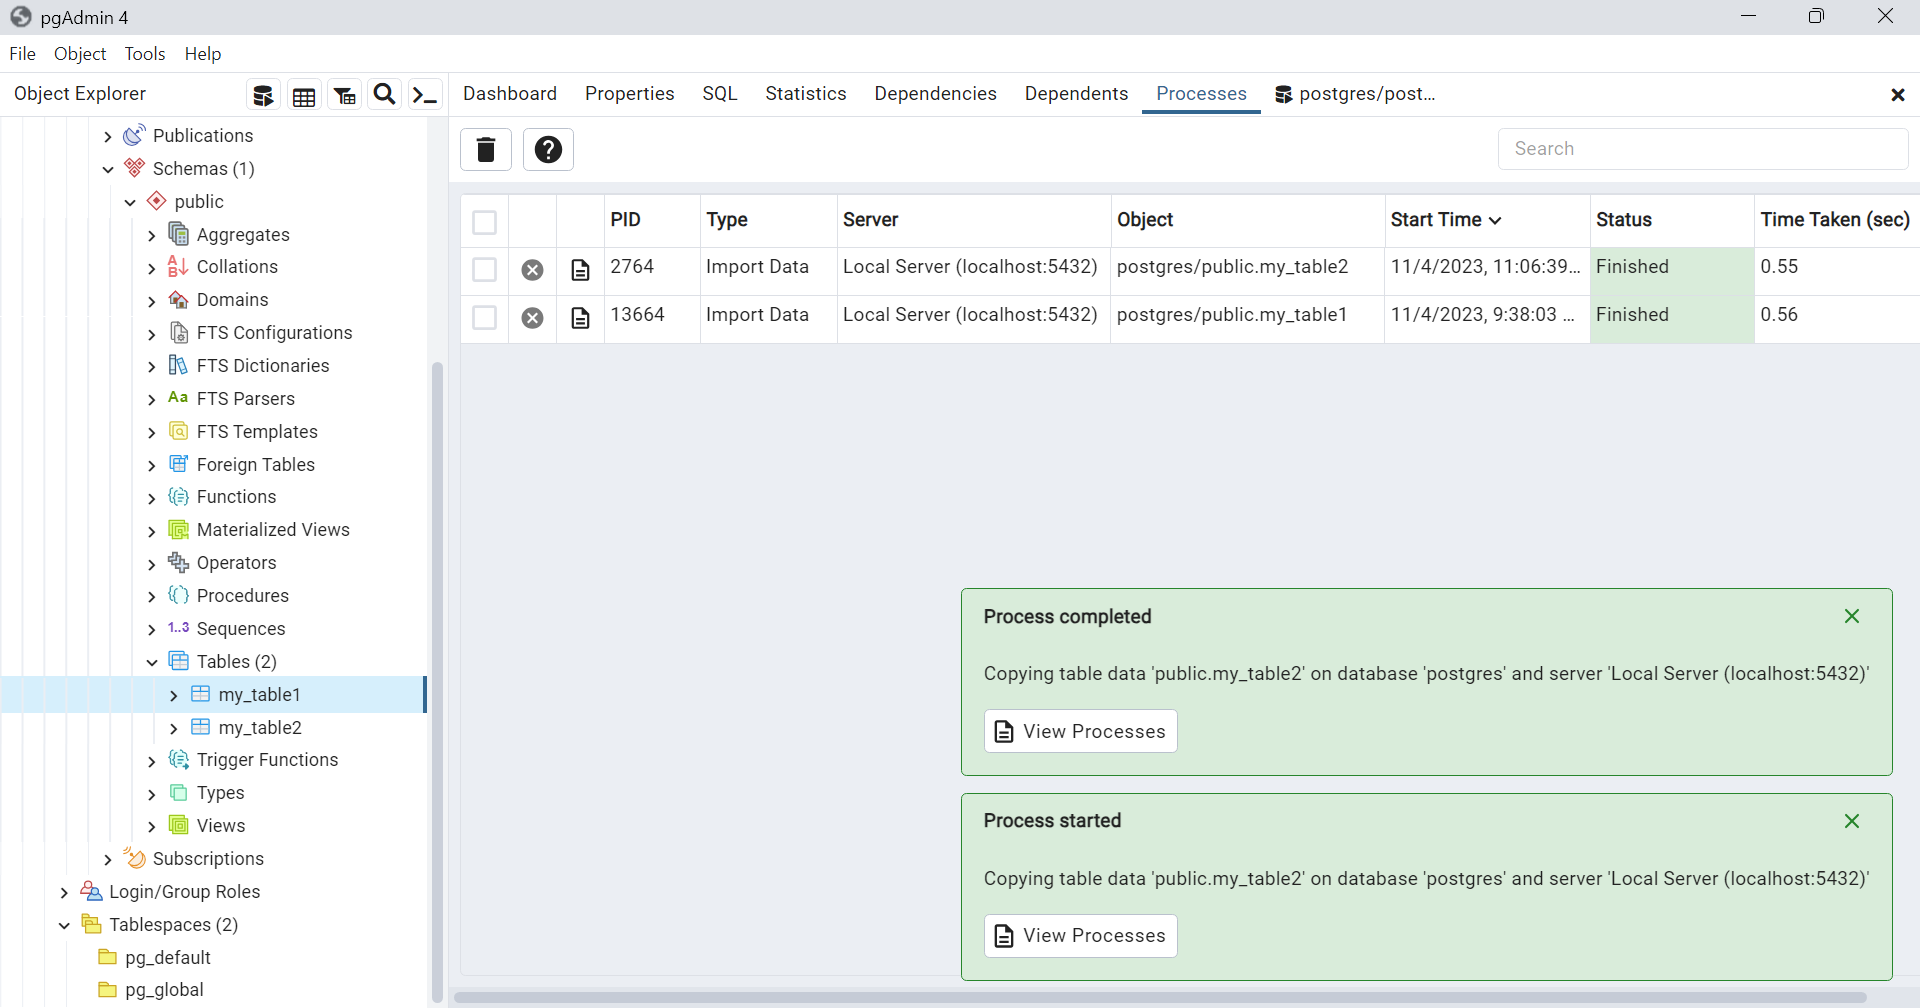

### **1.1.2 Write an SQL query to fetch Year and any relevant variables (e.g., Number of natural disasters, Economic damage).**
---

#### Show Tabel Economic Damage

In [ ]:
#karena semua code adalah Null maka bisa di hapus
select
	*
from total_economic_damage

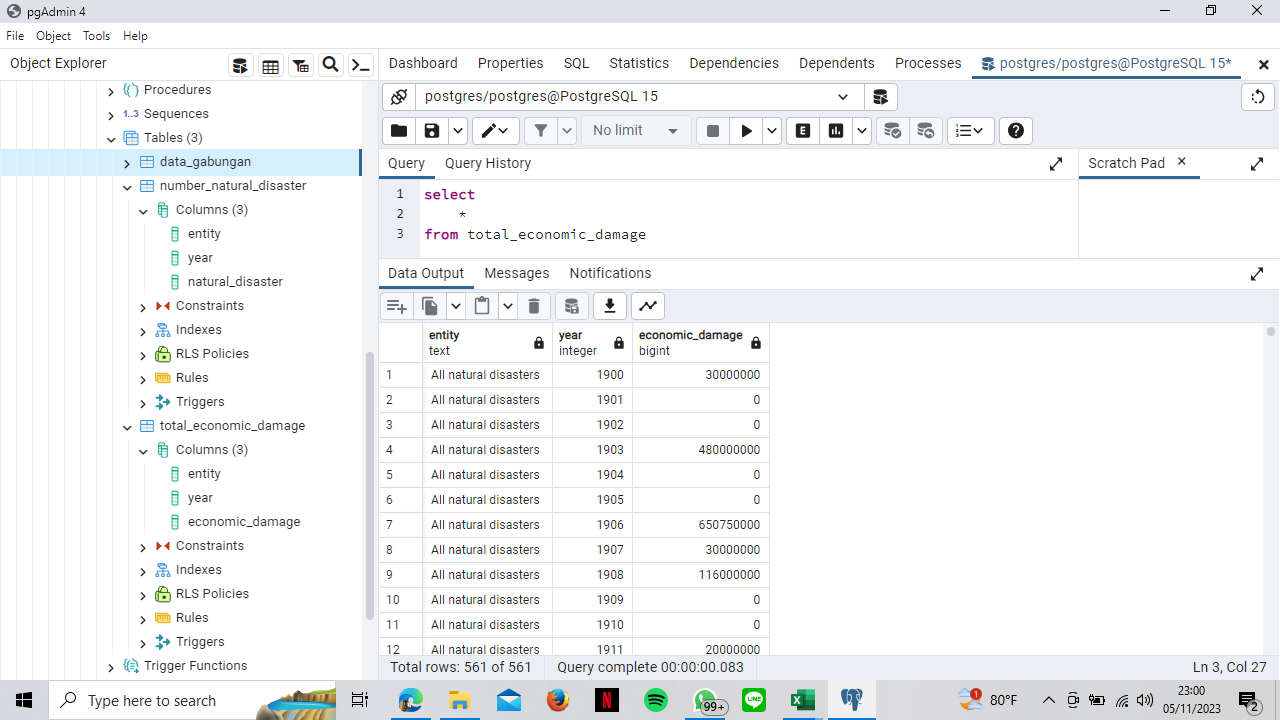

#### Show Tabel Number Natural Disaster

In [ ]:
#karena semua code adalah Null maka bisa di hapus
select
	*
from
	number_natural_disaster

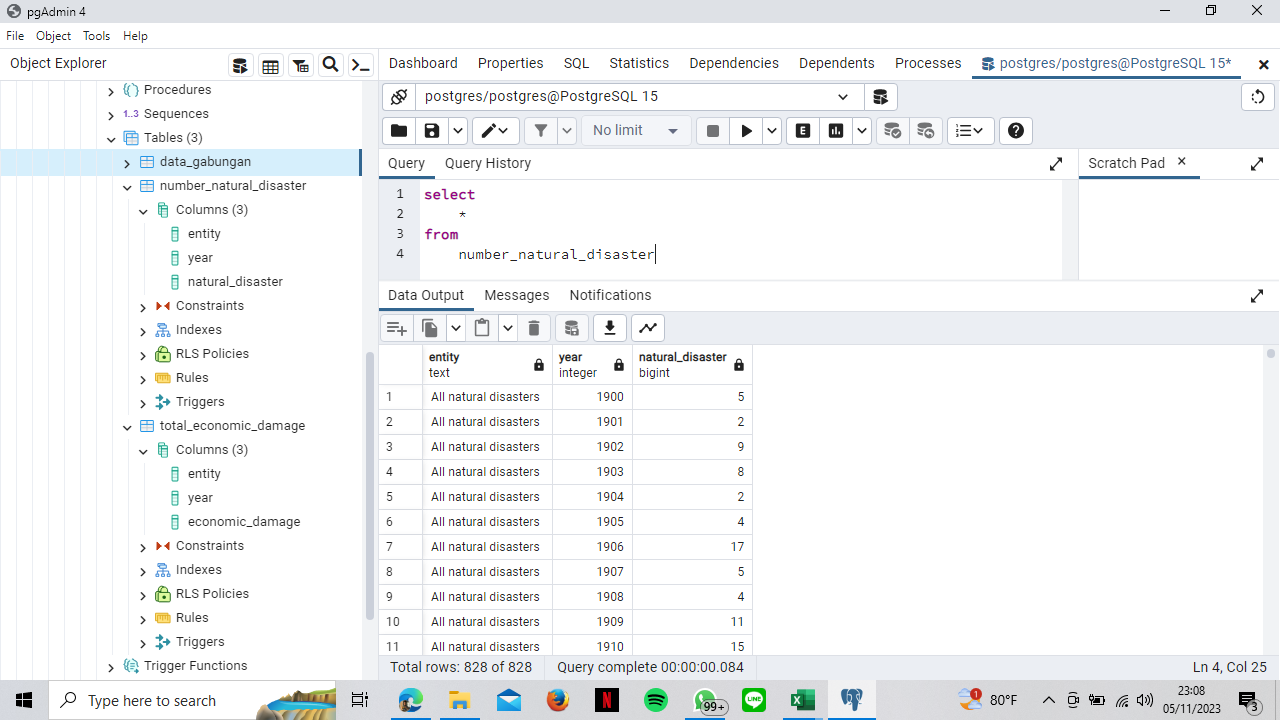

#### Show Tabel Gabungan (fulljoin)

In [ ]:
#create fulljoin untuk menggabungkan kedua data
create table data_gabungan as
select
	coalesce(number_natural_disaster.entity, total_economic_damage.entity) as entity,
	coalesce(number_natural_disaster.year, total_economic_damage.year) as year,
	natural_disaster, economic_damage
from
	total_economic_damage
	full join number_natural_disaster
	on total_economic_damage.year = number_natural_disaster.year and total_economic_damage.entity = number_natural_disaster.entity

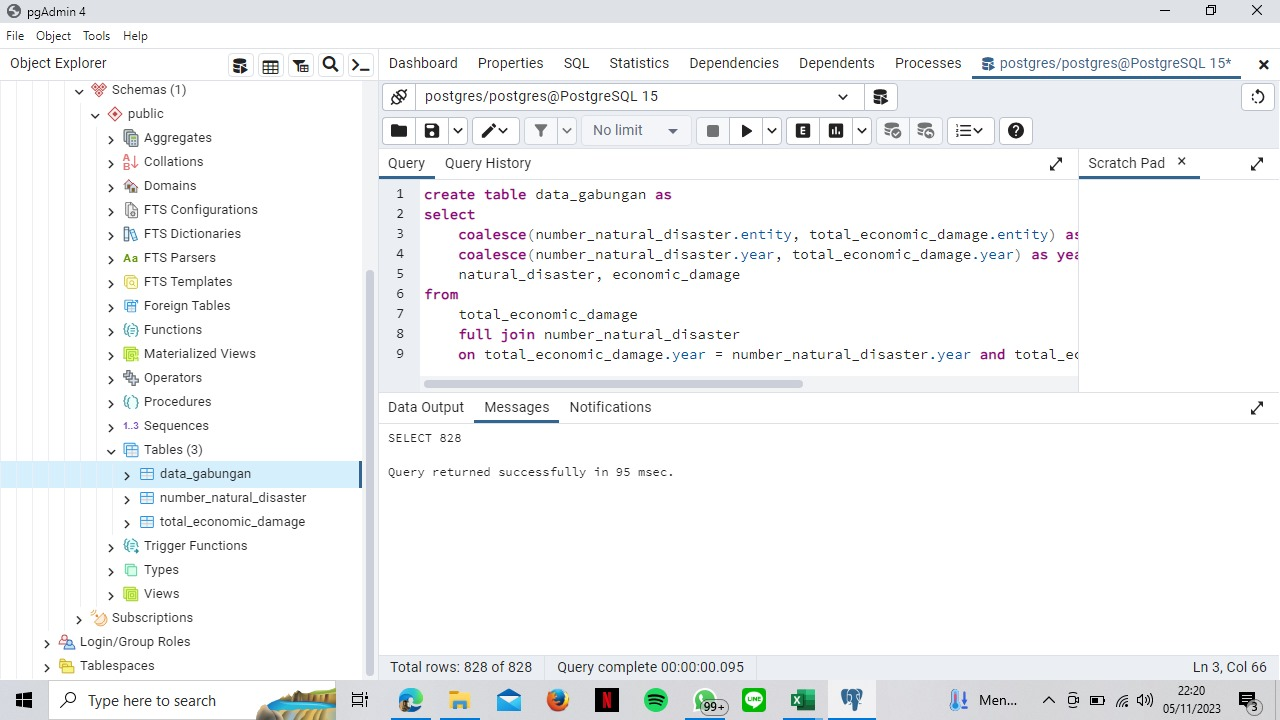

In [ ]:
#show data gabungan
select
	*
from
	data_gabungan

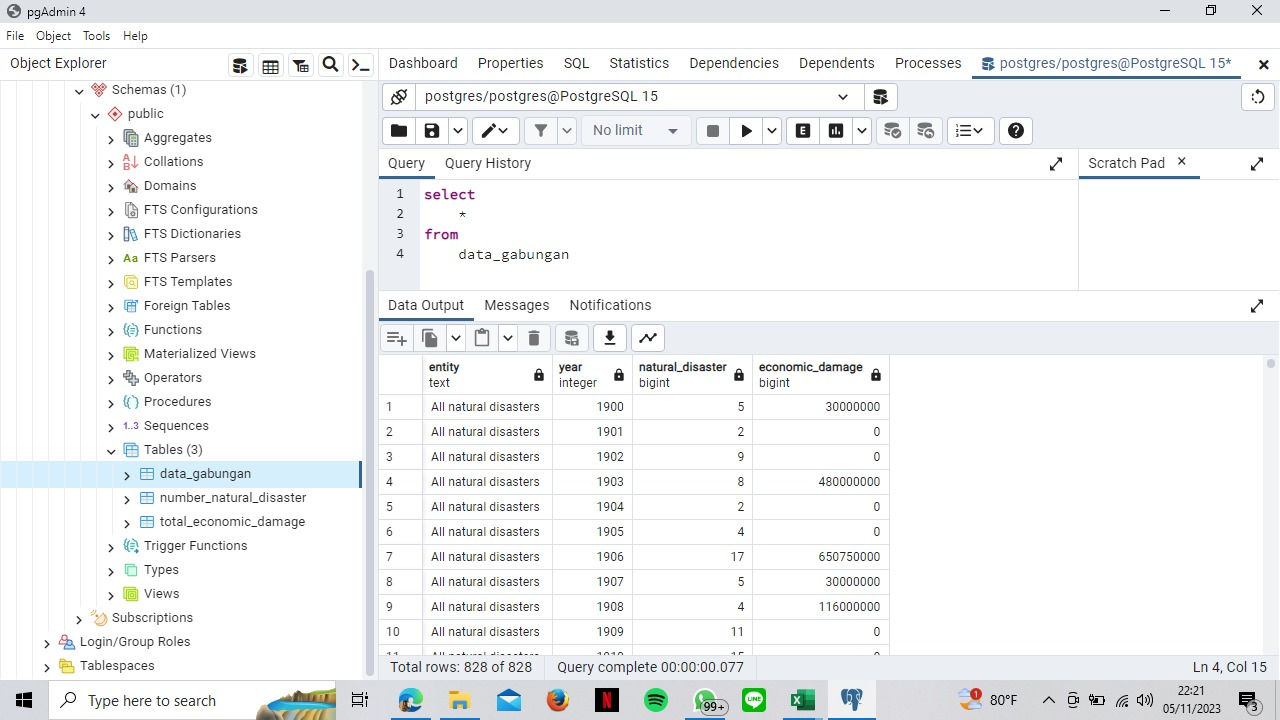

## 1.2 Database: SQL Query II

    1. Write SQL query to show Total Natural Disaster and Economic Damage for every type of Disaster (Entity)
    2. Write an SQL query to summarize the data per 10 year, calculating averages and sums for Natural disaster & Economic damage.


### **1.2.1 Write SQL query to show Total Natural Disaster and Economic Damage for every type of Disaster (Entity)**
---

#### Total Banyak Kejadian Muncul per Entity

In [ ]:
# show odds of how many natural disaster and economic damage per entity
select
	entity,
	count(economic_damage) as banyak_kejadian_ed_entity,
	count(natural_disaster) as banyak_kejadian_nd_entity
from
	data_gabungan
group by
	entity

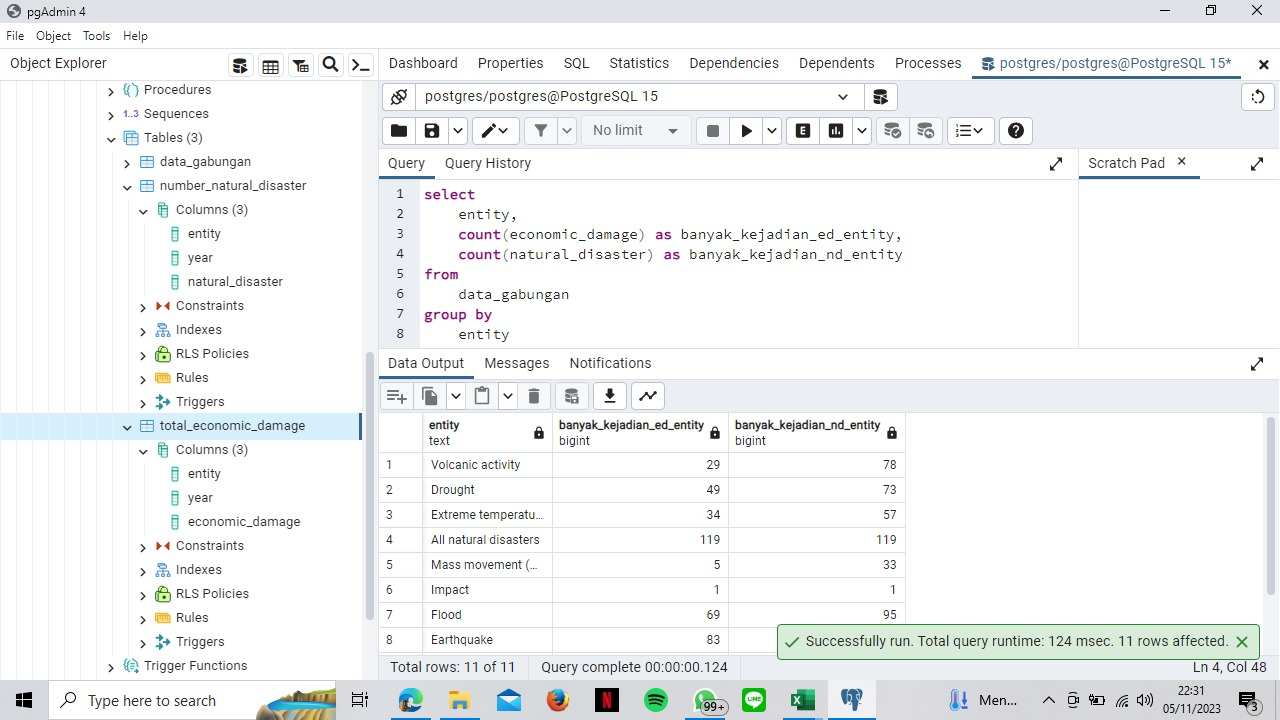

#### Total Jumlah Nilai Variabel per Entity

In [ ]:
# show sum of how many natural disaster and economic damage per entity
select
	entity,
	sum(economic_damage) as jumlah_total_ed_entity,
	sum(natural_disaster) as jumlah_total_nd_entity
from
	data_gabungan
group by
	entity

IndentationError: ignored

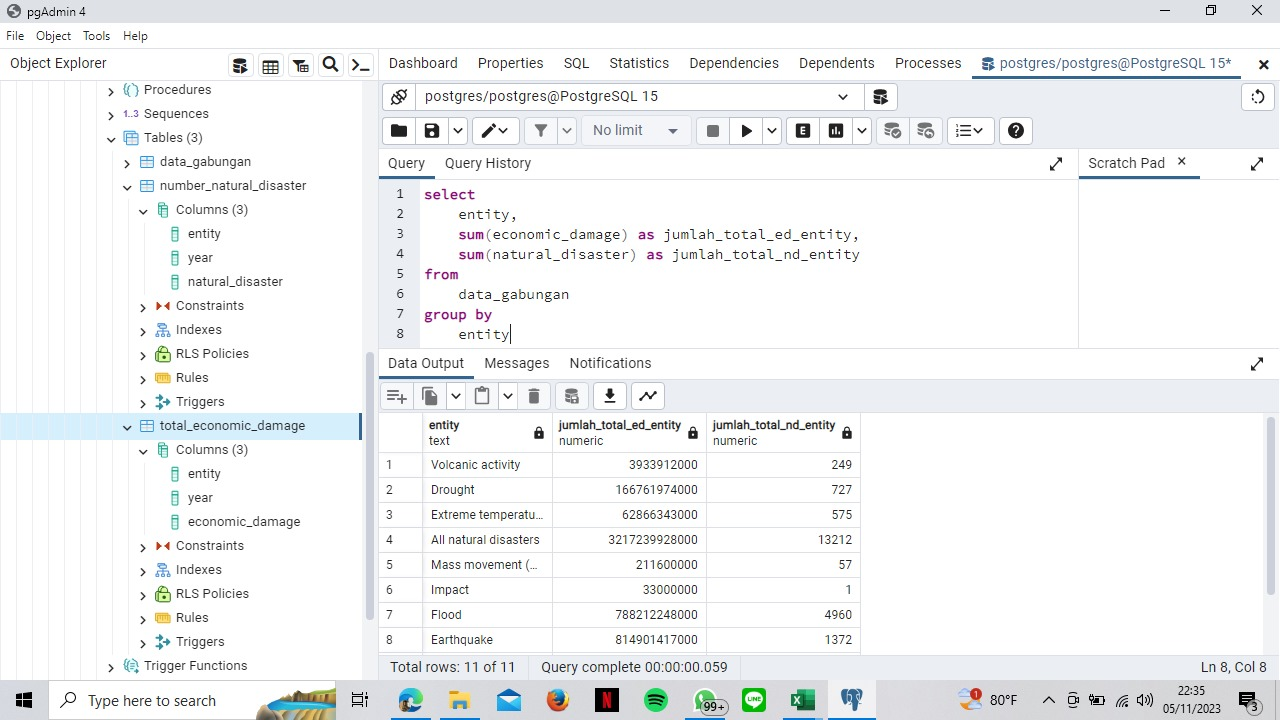

### **1.2.2 Write an SQL query to summarize the data per 10 year, calculating averages and sums for Natural disaster & Economic damage.**
---

In [ ]:
# summarize the data per 10 year, calculating average and sum for natural disaster and economic damage
SELECT
    FLOOR(year / 10) * 10 AS every_10_years,
    AVG(natural_disaster) AS avg_natural_disasters,
    SUM(natural_disaster) AS sum_natural_disasters,
    AVG(economic_damage) AS avg_economic_damage,
    SUM(economic_damage) AS sum_economic_damage
FROM
    data_gabungan
GROUP BY
    every_10_years
ORDER BY
    every_10_years

IndentationError: ignored

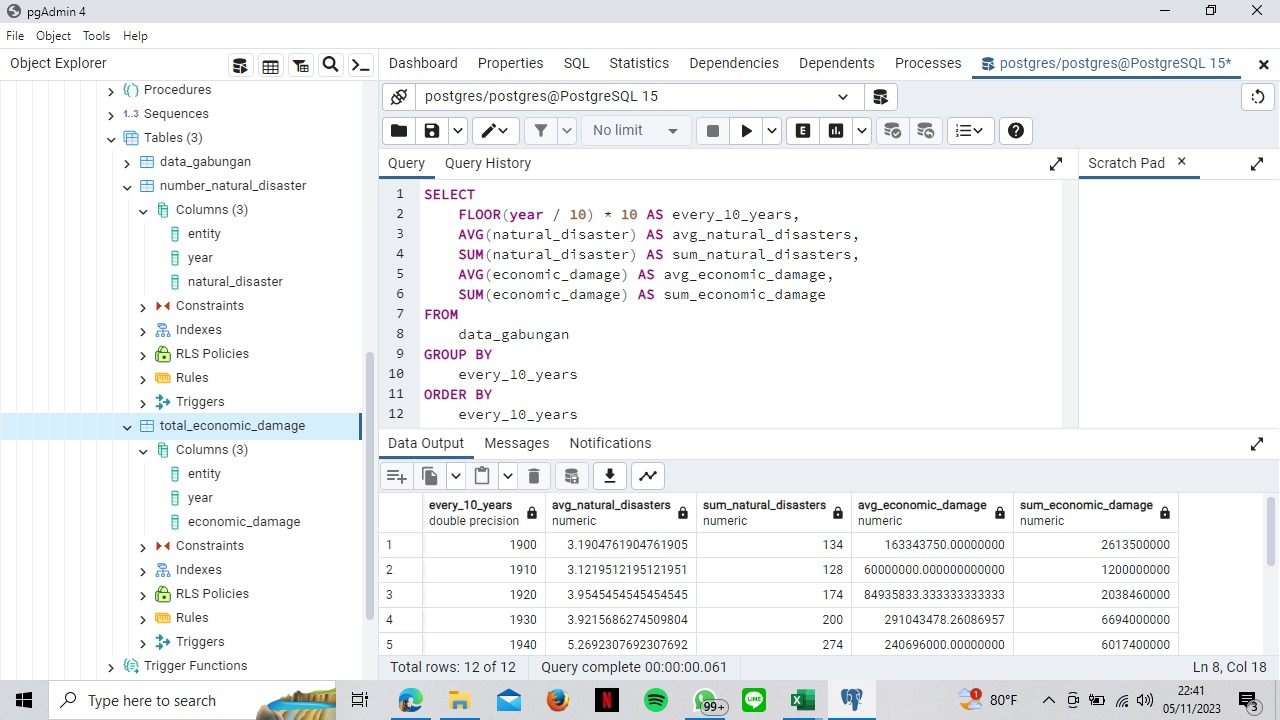

# **Part 2: Data Science and Statistical Analysis.**

---

Refer to the previous assignment framework for exercises on `Descriptive and Inferential Statistics, EDA, and Statistical Modeling.`


## **Import Library**
---

> Mengimport library yang nantinya diperlukan dalam menjalankan sebuah syntax, library ada banyak macamnya, namun dalam Assessment 3, saya menggunakan ; Pandas, Numpy, Matplotlib.Pyplot, Seaborn, Plotly.Express, Plotly.Figure_Factory, dan Scipy yang diinisialkan untuk menjalankan syntax nantinya.




In [ ]:
import pandas as pd #pembuatan dataframe dan visualisasi data
import numpy as np #operasi numerik
import matplotlib.pyplot as plt #visualisasi data
import seaborn as sns #visualisasi data
import plotly.express as px #import plot
import scipy as sp

## **Data Collection**


---



In [ ]:
#impor dataset
from google.colab import files
uploades = files.upload()

Saving data_gabungan.csv to data_gabungan.csv


In [ ]:
#name dataset data_gabungan
df = pd.read_csv('data_gabungan.csv',sep=",")
df

entity  year  natural_disaster  economic_damage
0    All natural disasters  1900                 5       30000000.0
1    All natural disasters  1901                 2              0.0
2    All natural disasters  1902                 9              0.0
3    All natural disasters  1903                 8      480000000.0
4    All natural disasters  1904                 2              0.0
..                     ...   ...               ...              ...
823      Volcanic activity  2010                 6              NaN
824    Extreme temperature  1953                 3              NaN
825             Earthquake  1917                 3              NaN
826               Wildfire  1986                 6              NaN
827      Volcanic activity  2009                 2              NaN

[828 rows x 4 columns]

## **Data Understanding**


---
> Tahap awal dalam proses analisis data yang bertujuan untuk mendapatkan wawasan yang mendalam tentang data yang akan dianalisis.

> Mengetahui tipe data yang diperoleh kolom merupakan categorical atau numerical columns yang terdiri dari data kuantitatif dimana memuat tipe data numerik, yaitu integer dan float. Dan kolom kategorik atau 'categorical columns' yang terdiri dari data kualitatif dimana memuat tipe data string, yaitu text.



In [ ]:
#checking variabel apa saja yang terdapat dalam dataset
df.columns

Index(['entity', 'year', 'natural_disaster', 'economic_damage'], dtype='object')

In [ ]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   entity            828 non-null    object 
 1   year              828 non-null    int64  
 2   natural_disaster  828 non-null    int64  
 3   economic_damage   561 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.0+ KB


In [ ]:
#count numerical and categorical data
num_cols = df._get_numeric_data().columns
cat_cols = list(set(df.columns) - set(num_cols))
print("Numerical columns: ",num_cols)
print("Categorical columns: ",cat_cols)

Numerical columns:  Index(['year', 'natural_disaster', 'economic_damage'], dtype='object')
Categorical columns:  ['entity']


## **Data Pre-processing**
---

> Dilakukan sebelum data digunakan dalam analisis data, pemodelan statistik, dan machine learning. Tujuan dari data preprocessing adalah untuk mempersiapkan data sehingga data tersebut dapat digunakan dengan efektif dan hasil analisis menjadi lebih akurat dan bermakna.


> Setelah dilakukan indentification dan checking, terlihat bahwa tidak adanya missing value dan duplikasi data pada dataset maka siap untuk diolah ke tahap selanjutnya.


In [ ]:
#melihat apakah terdapat missing value atau tidak
df.isnull().any()

entity              False
year                False
natural_disaster    False
economic_damage      True
dtype: bool

In [ ]:
# melihat jumlah missing value
df.isna().sum()

entity                0
year                  0
natural_disaster      0
economic_damage     267
dtype: int64

In [ ]:
#melihat duplikasi data pada dataset
df.duplicated().sum()

0

## **Data Cleaning**
---

> Dikarenakan adanya missing value maka perlu dilakukan data cleaning dan yaitu dengan menggantikan missing value atau NULL dengan nilai rerata pada variabel nya. Kemudian di cek kembali missingvalue apakah masih ada atau tidak.



In [ ]:
# mencari rata-rata per tahun
year_grouped = df.groupby('year')

# menghitung rata-rata pada kolom yang masih terdapat kekosongan nilai setiap tahun
avg_eco = year_grouped['economic_damage'].mean()

# input missing value
df.loc[:,'economic_damage'] = df.apply(lambda x: avg_eco[(x['year'])] if np.isnan(x['economic_damage']) else x['economic_damage'],axis=1)

In [ ]:
# checking apakah terdapat missing value atau tidak
df.isnull().any()

entity              False
year                False
natural_disaster    False
economic_damage     False
dtype: bool

In [ ]:
# Assuming df is your DataFrame
df.to_csv('data_gabungan_clean.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('data_gabungan_clean.csv')

### **Descriptive Statistics : `mean, median, standard deviation` for natural disasters and economic damage.**

In [ ]:
# statistik deskriptif
summary_stats = df.describe()
summary_stats

### **Descriptive Statistics : Mean**

> Mencari Mean untuk dataset, dan juga mencari Mean tiap variabel setiap tahun nya. Dapat dilihat dari hasil perhitungan mean per variabel diperoleh mean atau nilai rata-rata dari variabel natural disaster sebesar 31.913. Sedangkan, economic damage sebesar 9218182244.756.



In [ ]:
#mencari nilai mean natural disaster secara keseluruhan
mean_natural_disaster = df['natural_disaster'].mean()
mean_natural_disaster

NameError: ignored

In [ ]:
#mencari nilai mean economic damage secara keseluruhan
mean_economic_damage = df['economic_damage'].mean()
mean_economic_damage

In [ ]:
#mencari nilai mean natural disaster setiap tahun
mean_natural_disaster_year= df.groupby("year")['natural_disaster'].mean().to_frame().reset_index()
mean_natural_disaster_year

In [ ]:
#mencari nilai mean economic damage setiap tahun
mean_economic_damage_year= df.groupby("year")['economic_damage'].mean().to_frame().reset_index()
mean_economic_damage_year

### **Descriptive Statistics : Median**

> Mencari Median untuk dataset, dan juga mencari Median tiap variabel setiap tahun nya. Dapat dilihat dari hasil perhitungan median per variabel diperoleh median atau nilai tengah (Kuartil 2) dari variabel natural disaster sebesar 7.0. Sedangkan, economic damage sebesar 681600000.0.


In [ ]:
#mencari nilai median natural disaster secara keseluruhan
median_natural_disaster = df['natural_disaster'].median()
median_natural_disaster

In [ ]:
#mencari nilai median economic damage secara keseluruhan
median_economic_damage = df['economic_damage'].median()
median_economic_damage

In [ ]:
#mencari nilai median natural disaster setiap tahun
median_natural_disaster_year = df.groupby("year")['natural_disaster'].median().to_frame().reset_index()
median_natural_disaster_year

In [ ]:
#mencari nilai median economic damage setiap tahun
median_economic_damage_year= df.groupby("year")['economic_damage'].median().to_frame().reset_index()
median_economic_damage_year

### **Descriptive Statistics : Standard Deviation**

> Mencari Standart Deviation untuk dataset, dan juga mencari Standart Deviation tiap variabel setiap tahun nya. Dapat dilihat dari hasil perhitungan standar deviasi per variabel diperoleh standar deviasi atau dari variabel natural disaster sebesar 67.393. Sedangkan, economic damage sebesar 27300494591.755653.



In [ ]:
# mencari nilai standar deviasi natural disaster secara keseluruhan
std_natural_disaster = df['natural_disaster'].std()
std_natural_disaster

In [ ]:
# mencari nilai standar deviasi economic damage secara keseluruhan
std_economic_damage = df['economic_damage'].std()
std_economic_damage

In [ ]:
# mencari nilai standar deviasi natural disaster setiap tahun
std_natural_disaster_year = df.groupby("year")['natural_disaster'].std().to_frame().reset_index()
std_natural_disaster_year

NameError: ignored

In [ ]:
# mencari nilai standar deviasi econom  ic damage setiap tahun
std_economic_damage_year = df.groupby("year")['economic_damage'].std().to_frame().reset_index()
std_economic_damage_year

## **Exploratory Data Analysis - Univariate Analysis**
---

`Visualize the distribution of natural disaster and economic damage through plots like histograms or density plots.`

### **Histogram**

#### Economic Damage

> Berdasarkan hasil interpretasi dari grafik histrogram pertama entity dengan economic damage, terlihat bahwa entitas All Natural Disasters memiliki total economic damage terbesar dengan entitas Mass Movement (Dry) dan Volcanic Activity memiliki total economic damage terkecil.

> Berdasarkan hasil interpretasi dari grafik histrogram kedua year dengan economic damage, terlihat bahwa pada tahun 2010-2014 memiliki total economic damage terbesar dengan tahun 1900-1950 total economic damage terkecil.





In [ ]:
# create histogram economic damage berdasarkan entity dengan plotly.express
px.histogram(df, x = 'entity', y = 'economic_damage')

In [ ]:
# create histogram economic damage berdasarkan tahun dengan plotly.express
px.histogram(df, x = 'year', y = 'economic_damage')

#### Natural Disaster

> Berdasarkan hasil interpretasi dari grafik histrogram pertama entity dengan economic damage, terlihat bahwa entitas All Natural Disasters memiliki total natural disaster terbesar dengan entitas Impact memiliki total economic damage terkecil.

> Berdasarkan hasil interpretasi dari grafik histrogram kedua year dengan natural disaster, terlihat bahwa pada tahun 2005-2009 memiliki total natural disaster terbesar dengan tahun 1900-1904 dan tahun 1915-1919 memiliki total economic damage terkecil.




In [ ]:
# create histogram natural disaster berdasarkan entity dengan plotly.express
px.histogram(df, x = 'entity', y = 'natural_disaster')

In [ ]:
# create histogram natural disaster berdasarkan tahun dengan plotly.express
px.histogram(df, x = 'year', y = 'natural_disaster')

### **Density Plot**

#### Economic Damage

> Berdasarkan representasi visual dari grafik density plot, terlihat bahwa sebaran data memiliki kecenderungan menuju nilai yang lebih rendah atau sebelah kanan (skewness positif). Hal ini diperkuat oleh nilai skewness yang menunjukkan kemiringan positif, mengindikasikan bahwa distribusi data condong ke arah nilai yang lebih tinggi. Dengan demikian, dapat disimpulkan bahwa nilai rata-rata dari variabel economic damage lebih besar daripada nilai modus. Selain itu, distribusi data ini dapat dianggap cukup mendekati distribusi normal karena nilai skewness berada dalam kisaran antara -2 hingga 2.



In [ ]:
sns.set()

In [ ]:
print(sp.stats.skew(df['economic_damage'], axis=0, bias=True))

In [ ]:
# create density plot economic damage
sns.kdeplot(df['economic_damage'], shade=True, color='skyblue')
plt.xlabel('Economic Damage')
plt.ylabel('Density')
plt.title('Density Plot of Economic Damage')
plt.show()

#### Natural Disaster

> Berdasarkan representasi visual dari grafik density plot, terlihat bahwa sebaran data memiliki kecenderungan menuju nilai yang lebih rendah atau sebelah kanan (skewness positif). Hal ini diperkuat oleh nilai skewness yang menunjukkan kemiringan positif, mengindikasikan bahwa distribusi data condong ke arah nilai yang lebih tinggi. Dengan demikian, dapat disimpulkan bahwa nilai rata-rata dari variabel natural disaster lebih besar daripada nilai modus. Selain itu, distribusi data ini dapat dianggap cukup mendekati distribusi normal karena nilai skewness berada dalam kisaran antara -2 hingga 2.





In [ ]:
sns.set()

In [ ]:
print(sp.stats.skew(df['natural_disaster'], axis=0, bias=True))

In [ ]:
# create density plot natural disaster
sns.kdeplot(df['natural_disaster'], shade=True, color='skyblue')
plt.xlabel('Natural Disaster')
plt.ylabel('Density')
plt.title('Density Plot of Natural Disaster')
plt.show()

NameError: ignored

### **Distribution Plot**

#### Economic Damage

> Berdasarkan hasi representasi grafik distribution plot terlihat bahwa sebaran data cenderung condong ke arah kanan. Oleh karena itu, dapat disimpulkan bahwa nilai rata-rata dan median berada di sebelah kanan modus, yang berarti bahwa nilai rata-rata dan nilai tengah lebih besar daripada nilai modus.



In [ ]:
# create distribution Plot dengan library seaborn dan matplotlib.pyplot
sns.histplot(df['economic_damage'], kde=True, color='pink')
plt.xlabel('Economic Damage')
plt.ylabel('Frequency')
plt.title('Plot of Economic Damage')
plt.show()

#### Natural Disaster

> Berdasarkan hasil grafik distribution plot terlihat bahwa sebaran data cenderung condong ke arah kanan. Oleh karena itu, dapat disimpulkan bahwa nilai rata-rata dan median berada di sebelah kanan modus, yang berarti bahwa nilai rata-rata dan nilai tengah lebih besar daripada nilai modus.


In [ ]:
# create distribution Plot dengan library seaborn dan matplotlib.pyplot
sns.histplot(df['natural_disaster'], kde=True, color='skyblue')
plt.xlabel('Natural Disaster')
plt.ylabel('Frequency')
plt.title('Plot of Natural Disaster')
plt.show()

## **Exploratory Data Analysis - Bivariate Analysis**
---

`Investigate the relationship between year, natural disaster, and economic damage  using scatter plots, line plots, or correlation matrices.`

### **Scatterplot**

>  Berdasarkan hasil representasi grafis scatterplot pertama terlihat bahwa data cenderung mengelompok di suatu area tertentu. Oleh karena itu, dapat disarankan bahwa tidak ada hubungan linier yang jelas antara kedua variabel tersebut. Selain itu, terlihat adanya titik-titik data yang berbeda secara signifikan, menunjukkan bahwa distribusi data tidak mengikuti pola yang biasa (tidak normal).







In [ ]:
# create scatterplot dengan library plotly.express
px.scatter(df,x = 'natural_disaster', y = 'economic_damage', title='Correlation between natural disaster and economic damage')

#### Economic Damage by Year

>  Berdasarkan hasil representasi grafis scatterplot terlihat bahwa terlihat bahwa semakin besar tahun dimulai dar tahun 1980, maka semakin besar angka economic damage. Oleh karena itu, dapat disimpulkan bahwa keduanya memiliki hubungan positif (Positive Correlation).



In [ ]:
#membuat scatter plot antara year dengan natural disaster berdasarkan nilai rata-rata setiap tahun
px.scatter(mean_economic_damage_year,x = 'year', y = 'economic_damage', color='economic_damage',title='Correlation between year and natural disaster')

#### Natural Disaster by Year

> Berdasarkan hasil representasi grafis scatterplot ketiga terlihat bahwa terlihat bahwa semakin besar tahun, maka semakin besar angka natural disaster. Oleh karena itu, dapat disimpulkan bahwa keduanya memiliki hubungan positif (Positive Correlation).



In [ ]:
#membuat scatter plot antara year dengan natural disaster berdasarkan nilai rata-rata setiap tahun
px.scatter(mean_natural_disaster_year,x = 'year', y = 'natural_disaster', color='natural_disaster',title='Correlation between year and natural disaster')

### **Line Plot**

In [ ]:
# filter data 2009-2018
df_lim = df[(df['year'] >= 2009) & (df['year'] <= 2018)]

# menampilkan data 2009-2018
df_lim

#### Line Plot Economic Damage by Year

> Dilihat dari grafik lineplot mengenai kerusakan ekonomi berdasarkan tahun, terlihat bahwa dalam rentang tahun 1900 hingga awal tahun 1980, tidak ada tanda-tanda kerusakan ekonomi. Namun, sejak awal tahun 1980, terlihat adanya peningkatan angka kerusakan ekonomi yang sejalan dengan peningkatan tahun, mengindikasikan bahwa terdapat hubungan positif di antara keduanya. Dengan kata lain, dapat disimpulkan bahwa keduanya memiliki Positive Correlation yang terlihat jelas mulai dari awal tahun 1980.



In [ ]:
# create line plot antara year dengan economic damage berdasarkan nilai rata-rata setiap tahun
px.line(mean_economic_damage_year,x = 'year',y = 'economic_damage',title='Line plot between year and economic damage')

#### Line Plot Natural Disaster by Year

> Dari grafik lineplot mengenai bencana alam berdasarkan tahun, terlihat bahwa adanya peningkatan tahun juga diikuti oleh kenaikan angka bencana alam. Oleh karena itu, dapat disimpulkan bahwa keduanya memiliki hubungan positif atau Positive Correlation.



In [ ]:
# create line plot antara year dengan economic damage berdasarkan nilai rata-rata setiap tahun
px.line(mean_natural_disaster_year,x = 'year',y = 'natural_disaster',title='Line Plot Natural Disaster by Year')

### **Correlation Matrix**

> Berdasarkan hasil matriks korelasi terlihat bahwa antara variabel bencana alam dan kerusakan ekonomi memiliki korelasi yang kuat dan positif, yakni sebesar 0,68. Nilai ini berada dalam rentang 0,5 hingga 0,75. Ini mengindikasikan bahwa semakin meningkatnya angka bencana alam, maka akan semakin meningkat juga tingkat kerusakan ekonomi yang terjadi.



In [ ]:
# menamakan matrik korelasi seluruh variabel
correlation_matrix = df.corr()

# menampilkan nilai dari correlation matrix
correlation_matrix

In [ ]:
# create correlation matrix
plt.figure(figsize=(12, 10))  # Mengatur ukuran peta panas
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## **Supervised Learning - Regression - Simple Linear Regression**
---

`Perform a simple linear regression using Natural Disaster as the independent variable and Economic Damage as the dependent variable.`



### **Import Library**

In [ ]:
import numpy as np
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm #analisis statistik dan estimasi model statistik.

### **Data Collection**

In [ ]:
df

In [ ]:
# menampilkan data berupa Natural Disaster dan Economic Damage
data = df[['natural_disaster','economic_damage']]
data.head()

In [ ]:
# replace nama kolom menjadi x dan y
data.columns = ['x','y']
data.head()

In [ ]:
x = data['x']
y = data['y']

In [ ]:
# menampilkan data berupa Natural Disaster dan Economic Damage
data_2 = df[['natural_disaster','economic_damage']]
data_2

NameError: ignored

### **Simple Linear Regression**

---
Berdasarkan tabel dapat dilihat pada kolom coef terhadap baris const, diperoleh nilai konstanta sebesar 4.086e+08  dan kolom coef terhadap baris x, diperoleh nilai koefisien untuk variabel independent (x), yaitu sebesar 2.76e+08.

> Sehingga diperoleh model regresi natural disaster dan economic damage, yaitu :

`Model Regresi ` Y_hat = 4.086e+08 +2.76e+08X atau Y = 4.086e+08 + 2.76e+08X + error



In [ ]:
x = sm.add_constant(x)

In [ ]:
#Estimasi model regresi dengan menggunakan metode kuadrat terkecil (OLS)
model = sm.OLS(y, x).fit()
print(model.summary())

#### Analyze Simple Linear Regression by OLS / Least Square

> Berdasarkan kedua perhitungan, diperoleh nilai konstanta sebesar 408600547.34786797 dan nilai koefisien untuk variabel independent (x), yaitu sebesar 276049562.72532177.

> Sehingga diperoleh model regresi untuk data natural disaster dan economic damage, yaitu :

`Model Regresi ` Y_hat = 408600547.34786797 + 276049562.72532177X atau Y = 408600547.34786797 + 276049562.72532177X + error






In [ ]:
data['(x-x_mean)'] = round(data['x'] - data['x'].mean(),2)
data['(y-y_mean)'] = round(data['y'] - data['y'].mean(),2)
data['(x-x_mean)(y-y_mean)'] = data['(x-x_mean)'] * data['(y-y_mean)']
data['pow((x-x_mean),2)'] = round(pow(data['x'] - data['x'].mean(),2),2)
data

In [ ]:
# menghitung rata-rata y dan x
data['y'].mean(), data['x'].mean()

In [ ]:
#Rumus menghitung slope (b1)
b1 = data['(x-x_mean)(y-y_mean)'].sum() / data['pow((x-x_mean),2)'].sum()
b1

In [ ]:
#Rumus menghitung intercept (b0)
b0 = data['y'].mean() - b1 * data['x'].mean()
b0

In [ ]:
# Model Regresi Linier
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
textstr

In [ ]:
import statsmodels.api as sm

In [ ]:
ols_model = sm.OLS(data['y'],data['x'])
ols_results = ols_model.fit()
print(ols_results.summary())

#### Exploratory Data

> Dalam analisis ini, ingin dilakukan pembuatan Correlation Matrix antara variabel independen dan dependen.

> Berdasarkan output matriks korelasi  diperoleh bahwa antara variabel Natural Disaster and Economic Damage memiliki hubungan yang kuat dan positif karena korelasi mendekati diantara nilai 0.5 - 0.75, yaitu sebesar 0.68. Artinya, semakin bertambah angka bencana alam (natural disaster), maka semakin bertambah tingkat kerusakan ekonomi (economic damage) yang terjadi.

> Berdasarkan hasil visualisasi scatterplot di grafik ke-tiga menunjukkan terdapat hubungan yang positif antara variabel Natural Disaster dan Economic Damage. Artinya, semakin bertambah angka becana alam, maka tingkat kerusakan ekonomi yang terjadi.





In [ ]:
# menampilkan nilai korelasi
data_2.corr()

NameError: ignored

In [ ]:
# mengetahui korelasi antar atribut/variabel bebas melalui heatmap
plt.figure(figsize = (12,6))
heatmap = sns.heatmap(data_2.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix between Natural Disaster and Economic Damage')
plt.show()

In [ ]:
# create histogram
data_2.hist(figsize=(12,10))

In [ ]:
fit = np.polyfit(data_2['natural_disaster'], data_2['economic_damage'], deg=1)
y_hat = fit[1] + data_2['natural_disaster'] * fit[0]

fig, ax = plt.subplots(figsize=(12,6))
sns.regplot(x=data_2['natural_disaster'], y=data_2['economic_damage'])
plt.vlines(data_2['natural_disaster'], y_hat, data_2['economic_damage'], lw = .4, colors='r');

#Menambahkan title
title = 'Natural Disaster and Economic Damage'

# **Part 3: Data Product Development.**
---

Data Product Development (Dashboard)
Develop a dashboard showcasing:

      1. Historical trends for all type of Natural Disasters and the Economic Damage.
      2. Predictive models for future Disasters and Economic Damage.
      3. Yearly summaries.
      
Use Google Data Studio.


## Looker Studio

> https://lookerstudio.google.com/reporting/858cb635-859d-4fab-b0f0-16bbc4db547c


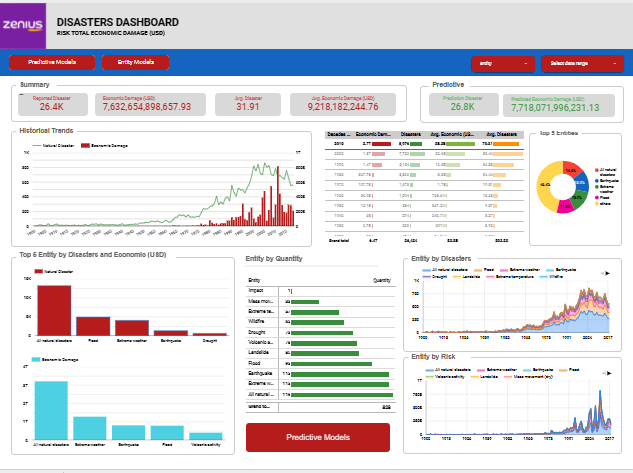

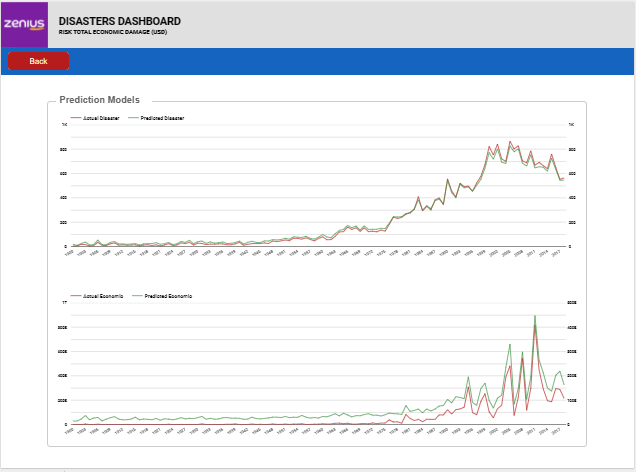

## Data Prediction

In [ ]:
# impor dataset
from google.colab import files
uploades = files.upload()

In [ ]:
#name dataset finaL_data1
data_yearly = pd.read_csv('data_gabungan_clean.csv',sep=",")
data_yearly

In [ ]:
# menjumlahkan setiap variabel setiap tahun
data_yearly = data_yearly.groupby(['entity', 'year']).agg({'natural_disaster': 'sum', 'economic_damage': 'sum'}).reset_index()
data_yearly

In [ ]:
# compute lag
data_yearly['lag_1_nat'] = data_yearly['natural_disaster'].shift(1)
data_yearly['lag_1_net'] = data_yearly['economic_damage'].shift(1)

In [ ]:
# showing final data for predictive
pred = data_yearly
pred

In [ ]:
# import library for predict
import statsmodels.api as sm
import seaborn as sns

In [ ]:
data_predict = pd.DataFrame([])

for entity in pred.entity.unique():
    economic_damage = pred[pred['entity']== entity].sort_values(by=['year']).reset_index(drop=True)
    economic_damage = economic_damage[['entity','year','economic_damage','lag_1_net']].dropna()

    natural_disaster = pred[pred['entity']== entity].sort_values(by=['year']).reset_index(drop=True)
    natural_disaster = natural_disaster[['entity','year','natural_disaster','lag_1_nat']].dropna()


    try:
      y_eco = economic_damage['economic_damage']
      x_eco = economic_damage['lag_1_net']
      model_eco = sm.OLS(y_eco, sm.add_constant(x_eco))
      result_eco = model_eco.fit()
      b_eco, m_eco = result_eco.params

      economic_damage['prediction_eco']=economic_damage['economic_damage']*m_eco + b_eco
      sns.lineplot(x='year', y='value', hue='variable',
                   data=pd.melt(economic_damage[['year','economic_damage','lag_1_net','prediction_net']],['year']))
    except:
      economic_damage['prediction_net'] = 0

    try:
      y_dis = natural_disaster['natural_disaster']
      x_dis = natural_disaster['lag_1_nat']
      model_dis = sm.OLS(y_dis, sm.add_constant(x_dis))
      result_dis = model_dis.fit()
      b_dis, m_dis = result_dis.params

      natural_disaster['prediction_dis']=natural_disaster['natural_disaster']*m_dis + b_dis
      sns.lineplot(x='year', y='value', hue='variable',
                   data=pd.melt(natural_disaster[['year','natural_disaster','lag_1_nat','prediction_nat']],['year']))
    except:
      natural_disaster['prediction_nat'] = 0

    print(entity)
    print(b_dis, m_dis, b_eco, m_eco)

    data_all = natural_disaster.merge(economic_damage, how='left', on = ['year','entity'])

    data_predict = data_predict.append(data_all).reset_index(drop=True)

In [ ]:
print(data_predict.shape)
data_predict

In [ ]:
# Assuming df is your DataFrame
data_predict.to_csv('prediction.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('prediction.csv')

#**Part 4:Making Impact with Data Science**
---

    Write a report (500-1000 words) on how the findings can contribute to societal change in the context of climate.
    Discuss potential strategies for mitigation and adaptation.
    Use additional data from valid reference if you will.

`Link Report based on Dashboard` :
https://docs.google.com/document/d/1kA3bH328CMDD4yMlBryn5Z4LPfeeKJB4oXYkAKaiQro/edit?usp=sharing